### Lecture 04

Let's look at the redshift distributions of the quasars in the Sloan Digital Sky Survey.

The Sloan Digital Sky Survey or SDSS is a major multi-spectral imaging and spectroscopic redshift survey using a dedicated 2.5-m wide-angle optical telescope at Apache Point Observatory in New Mexico, United States. Operations started in 1998.

In phase 1, SDSS has released photometry data 357 million (!!!) unique sources and 1.6 million spectra. In phase 2, SDSS observed the same patch of the sky many times ("time domain astronomy", and now we're going to have LSST!)

- Upsample this distribution in two ways, using both rejection sampling and inverse transform.
- Check, at least visually, that the two cloned distribitions are indeed similar to the observed one (for a quantitative check, come back to this point in a few lectures)

(Hint: `scipy.stats` is your best friend)

- Think about the cosmology of quasars. How do you think they are distributed? Overplot the theorethical distribution to the measured SDSS data 

(Hint: `astropy.cosmology` is another close friend). The best-fit cosmological model from the Plack data is:

In [1]:
from astroML.datasets import fetch_dr7_quasar

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

plt.rcParams['figure.figsize']=(8,5) 
plt.rcParams['font.size']=16 
plt.rcParams['font.family']='Liberation Serif' 
plt.rcParams['figure.autolayout']=True 
plt.rcParams['mathtext.fontset'] = 'cm'

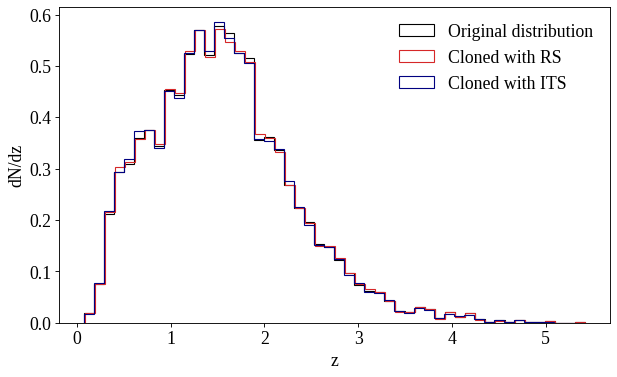

In [3]:
plt.figure(dpi = 80, figsize = (8, 5))

#Draw the original distribution
nbins = 50
plt.hist(z, bins = nbins, histtype='step', color='black', density = True, label = 'Original distribution')
plt.xlabel(r'z')
plt.ylabel(r'dN/dz')

### 1. Rejection sampling ###

#define an np.histogram
counts, bins = np.histogram(z, bins=50, density=True)
#generate the correspondent distribution given the histogram
disth = scipy.stats.rv_histogram((counts,bins))
#with .rvs generate randomly from this distribution
N = 100000
z_cloned1 = disth.rvs(size=N)
plt.hist(z_cloned1, bins=nbins, density=True, color = 'tab:red', histtype='step',label='Cloned with RS');


### 2. Inverse transform sampling ###

from astroML.density_estimation import EmpiricalDistribution
z_cloned2 = EmpiricalDistribution(z).rvs(N)
plt.hist(z_cloned2, bins = nbins, histtype='step', color='navy', density = True, label = 'Cloned with ITS');

plt.legend(frameon = False)

In [4]:
#Check if the two cloned distributions are compatible with the original one
D, p = scipy.stats.ks_2samp(z, z_cloned1)
print("KS test on RS: D = %.2g; p = %.2g" % (D, p))
D, p = scipy.stats.ks_2samp(z, z_cloned2)
print("KS test on ITS: D = %.2g; p = %.2g" % (D, p))

KS test on RS: D = 0.0055; p = 0.95
KS test on ITS: D = 0.0042; p = 1


If Quasars were distributed uniformely in comoving volume we would have 
$$ \frac{dN}{dV} = const $$
which means
$$ \frac{dN}{dz} = const \cdot \frac{dV}{dz} $$

Text(0, 0.5, 'dN/dz')

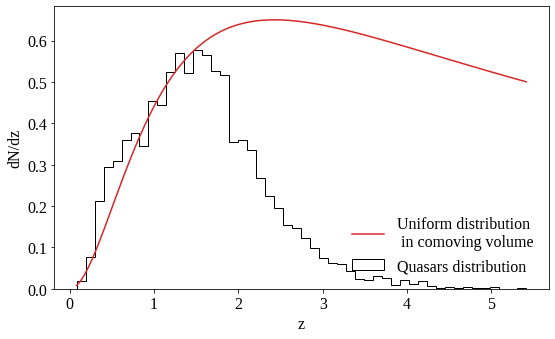

In [5]:
#this is dN/dz
x = np.linspace(np.min(z), np.max(z), 1000)
plt.hist(z, bins = nbins, histtype='step', color='black', density = True, label = 'Quasars distribution')

#evaluate dV/dz from astropy
import astropy
astropy.cosmology.Planck15

dV = astropy.cosmology.Planck15.differential_comoving_volume(x).value

#normalization by eye
plt.plot(x, dV/6.5e10, c = 'tab:red', label = 'Uniform distribution \n in comoving volume')

plt.legend(frameon = False)
plt.xlabel('z')
plt.ylabel('dN/dz')